In [1]:
import pandas as pd
import webbrowser
import os

# Read the dataset into a data table using Pandas
data_table = pd.read_csv("NEWNEETDATA.csv")

# Create a web page view of the data for easy viewing
html = data_table[0:100].to_html()

# Save the html to a temporary file
with open("neet.html", "w") as f:
    f.write(html)

# Open the web page in our web browser
full_filename = os.path.abspath("neet.html")
webbrowser.open("file://{}".format(full_filename))

True

In [2]:
import pandas as pd 
import numpy as np

In [3]:
pd.__version__

u'0.23.4'

In [4]:
Read_Neet = pd.read_csv('NEWNEETDATA.csv')
del Read_Neet['SNO']
del Read_Neet['NAME']

In [5]:
Read_Neet.head()

,RANK,ARNO,SEX,NEETNO,COM,MARKS,COLLEGENAME,QUOTA,COLLEGETYPE,FEES,COURSE,Year
0,27.0,3903.0,M,80078691.0,BCM,594.0,"MADRAS MEDICAL COLLEGE, CHENNAI",GOVT,GOVT,13600.0,MBBS,2017
1,30.0,211.0,F,80934693.0,OC,590.0,"MADRAS MEDICAL COLLEGE, CHENNAI",GOVT,GOVT,13600.0,MBBS,2017
2,32.0,50032.0,F,80462392.0,OC,587.0,"MADRAS MEDICAL COLLEGE, CHENNAI",GOVT,GOVT,13600.0,MBBS,2017
3,45.0,452.0,M,80136792.0,MBC/DNC,577.0,"MADRAS MEDICAL COLLEGE, CHENNAI",GOVT,GOVT,13600.0,MBBS,2017
4,46.0,24946.0,F,80686311.0,OC,575.0,"MADRAS MEDICAL COLLEGE, CHENNAI",GOVT,GOVT,13600.0,MBBS,2017


In [6]:
Read_Neet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12355 entries, 0 to 12354
Data columns (total 12 columns):
RANK           11954 non-null float64
ARNO           11545 non-null float64
SEX            11544 non-null object
NEETNO         11826 non-null float64
COM            12338 non-null object
MARKS          12112 non-null float64
COLLEGENAME    12355 non-null object
QUOTA          12355 non-null object
COLLEGETYPE    12355 non-null object
FEES           5745 non-null float64
COURSE         12355 non-null object
Year           12355 non-null int64
dtypes: float64(5), int64(1), object(6)
memory usage: 1.1+ MB


In [7]:
Read_Neet.describe()

,RANK,ARNO,NEETNO,MARKS,FEES,Year
count,11954.000000,11545.000000,1.182600e+04,12112.000000,5745.000000,12355.000000
mean,7760.303999,23388.046254,3.014295e+08,302.995707,2389.442994,2017.502631
std,22463.551051,26321.586120,2.150766e+08,121.058218,5177.202680,0.500013
min,4.000000,3.000000,2.070000e+02,96.000000,0.000000,2017.000000
25%,1553.250000,5609.000000,8.039335e+07,206.000000,0.000000,2017.000000
50%,3554.000000,12387.000000,5.050295e+08,308.000000,0.000000,2018.000000
75%,8861.500000,24063.000000,5.116021e+08,384.000000,0.000000,2018.000000
max,553708.000000,99159.000000,5.149002e+08,656.000000,13699.000000,2018.000000


In [8]:
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.externals import joblib

In [9]:
features_Neet = pd.get_dummies(Read_Neet, columns=['SEX','COM','QUOTA','COLLEGETYPE','COURSE'])
features_Neet.head()

,RANK,ARNO,NEETNO,MARKS,COLLEGENAME,FEES,Year,SEX_F,SEX_IM,SEX_M,...,QUOTA_ALL INDIA,QUOTA_GOVT,QUOTA_MANG,QUOTA_MANG,QUOTA_NRI,QUOTA_NRI,COLLEGETYPE_GOVT,COLLEGETYPE_PRIVATE,COURSE_BDS,COURSE_MBBS
0,27.0,3903.0,80078691.0,594.0,"MADRAS MEDICAL COLLEGE, CHENNAI",13600.0,2017,0,0,1,...,0,1,0,0,0,0,1,0,0,1
1,30.0,211.0,80934693.0,590.0,"MADRAS MEDICAL COLLEGE, CHENNAI",13600.0,2017,1,0,0,...,0,1,0,0,0,0,1,0,0,1
2,32.0,50032.0,80462392.0,587.0,"MADRAS MEDICAL COLLEGE, CHENNAI",13600.0,2017,1,0,0,...,0,1,0,0,0,0,1,0,0,1
3,45.0,452.0,80136792.0,577.0,"MADRAS MEDICAL COLLEGE, CHENNAI",13600.0,2017,0,0,1,...,0,1,0,0,0,0,1,0,0,1
4,46.0,24946.0,80686311.0,575.0,"MADRAS MEDICAL COLLEGE, CHENNAI",13600.0,2017,1,0,0,...,0,1,0,0,0,0,1,0,0,1


In [10]:
X = features_Neet.drop(['FEES','COLLEGENAME','Year'],axis=1)
X = X.fillna(X.mean()).as_matrix()
X


C:\Users\hp\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[2.70000000e+01, 3.90300000e+03, 8.00786910e+07, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.00000000e+01, 2.11000000e+02, 8.09346930e+07, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.20000000e+01, 5.00320000e+04, 8.04623920e+07, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [4.07500000e+03, 3.53300000e+03, 5.11806402e+08, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.12500000e+03, 1.12060000e+04, 5.12004155e+08, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [7.08900000e+03, 6.17300000e+03, 5.11605339e+08, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [11]:
College = features_Neet['COLLEGENAME']
College.head()

0    MADRAS MEDICAL COLLEGE, CHENNAI
1    MADRAS MEDICAL COLLEGE, CHENNAI
2    MADRAS MEDICAL COLLEGE, CHENNAI
3    MADRAS MEDICAL COLLEGE, CHENNAI
4    MADRAS MEDICAL COLLEGE, CHENNAI
Name: COLLEGENAME, dtype: object

In [12]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
Read_Neet['COLLEGENAME']= label_encoder.fit_transform(Read_Neet['COLLEGENAME']) 
  
Read_Neet['COLLEGENAME'].unique() 


array([28, 43, 25, 29, 47,  5, 51,  9, 16, 14, 50, 21, 55, 48, 12, 56, 49,
       37, 52, 15, 17, 18, 34, 13,  6, 23, 31, 38, 11, 19, 54, 45,  2, 40,
       46, 33,  0,  4, 20, 26, 32, 35, 39, 41, 57, 27,  7, 10, 42, 44, 36,
       30,  3, 22, 53, 24,  1,  8], dtype=int64)

In [13]:
y = Read_Neet['COLLEGENAME'].as_matrix()
y

C:\Users\hp\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([28, 28, 28, ..., 19, 19, 19])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)


In [15]:
X_train
y_train
X_test
y_test

array([20, 23,  7, ..., 45, 43, 12])

In [38]:
model = ensemble.GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=6,
    min_samples_leaf=9,
    max_features=0.1,
    loss='huber'
)
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=6,
             max_features=0.1, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=9, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [39]:
mae = mean_absolute_error(y_train, model.predict(X_train))
print("Training Set Mean Absolute Error: %.2f" % mae)

# Find the error rate on the test set
mae = mean_absolute_error(y_test, model.predict(X_test))
print("Test Set Mean Absolute Error: %.2f" % mae)

Training Set Mean Absolute Error: 8.91
Test Set Mean Absolute Error: 12.10


In [40]:
joblib.dump(model, 'model/trained_Neet.pkl')

['model/trained_Neet.pkl']

In [19]:
Columns = features_Neet.columns.tolist()
Columns

['RANK',
 'ARNO',
 'NEETNO',
 'MARKS',
 'COLLEGENAME',
 'FEES',
 'Year',
 'SEX_F',
 'SEX_IM',
 'SEX_M',
 'SEX_ST',
 'SEX_UR',
 'COM_AIQ',
 'COM_BC',
 'COM_BC (ES)',
 'COM_BC (PH)',
 'COM_BC (SP)',
 'COM_BCM',
 'COM_ESIQ',
 'COM_GN',
 'COM_GN (PH)',
 'COM_MBC/DNC',
 'COM_MBC/DNC (ES)',
 'COM_MBC/DNC (PH)',
 'COM_MBC/DNC (SP)',
 'COM_OBC',
 'COM_OBC (PH)',
 'COM_OC',
 'COM_OC (PH)',
 'COM_OC (SP)',
 'COM_SC',
 'COM_SC (PH)',
 'COM_SCA',
 'COM_ST',
 'COM_ST (PH)',
 'COM_UR',
 'COM_UR (PH)',
 'QUOTA_ALL INDIA',
 'QUOTA_ALL INDIA ',
 'QUOTA_GOVT',
 'QUOTA_MANG',
 'QUOTA_MANG ',
 'QUOTA_NRI',
 'QUOTA_NRI ',
 'COLLEGETYPE_GOVT',
 'COLLEGETYPE_PRIVATE',
 'COURSE_BDS',
 'COURSE_MBBS']

In [41]:
import numpy as np
from sklearn.externals import joblib

# Load the trained model created with train_model.py
model = joblib.load('model/trained_Neet.pkl')

In [21]:
# These are the feature labels from our data set
feature_labels = np.array(Columns)
feature_labels

array(['RANK', 'ARNO', 'NEETNO', 'MARKS', 'COLLEGENAME', 'FEES', 'Year',
       'SEX_F', 'SEX_IM', 'SEX_M', 'SEX_ST', 'SEX_UR', 'COM_AIQ',
       'COM_BC', 'COM_BC (ES)', 'COM_BC (PH)', 'COM_BC (SP)', 'COM_BCM',
       'COM_ESIQ', 'COM_GN', 'COM_GN (PH)', 'COM_MBC/DNC',
       'COM_MBC/DNC (ES)', 'COM_MBC/DNC (PH)', 'COM_MBC/DNC (SP)',
       'COM_OBC', 'COM_OBC (PH)', 'COM_OC', 'COM_OC (PH)', 'COM_OC (SP)',
       'COM_SC', 'COM_SC (PH)', 'COM_SCA', 'COM_ST', 'COM_ST (PH)',
       'COM_UR', 'COM_UR (PH)', 'QUOTA_ALL INDIA', 'QUOTA_ALL INDIA ',
       'QUOTA_GOVT', 'QUOTA_MANG', 'QUOTA_MANG ', 'QUOTA_NRI',
       'QUOTA_NRI ', 'COLLEGETYPE_GOVT', 'COLLEGETYPE_PRIVATE',
       'COURSE_BDS', 'COURSE_MBBS'], dtype='|S19')

In [22]:
# Create a numpy array based on the model's feature importances
importance = model.feature_importances_

In [23]:
# Sort the feature labels based on the feature importance rankings from the model
feauture_indexes_by_importance = importance.argsort()

In [24]:
# Print each feature label, from most important to least important (reverse order)
for index in feauture_indexes_by_importance:
    print("{} - {:.2}%".format(feature_labels[index], (importance[index] * 100.0)))


COM_SC (PH) - 0.0%
COM_MBC/DNC (PH) - 0.0%
COM_OC (PH) - 0.0%
COM_MBC/DNC - 0.0%
COM_GN (PH) - 0.0%
COM_GN - 0.0%
COM_BCM - 0.0%
COM_BC (SP) - 0.0%
COM_OBC - 0.0%
COM_AIQ - 0.0%
SEX_UR - 0.0%
COM_BC - 0.0%
SEX_M - 0.0%
SEX_IM - 0.0%
SEX_F - 0.0%
FEES - 0.0%
QUOTA_MANG - 0.0%
COM_OBC (PH) - 0.0%
COM_ST - 0.0013%
QUOTA_GOVT - 0.068%
COM_OC (SP) - 0.11%
COM_SC - 0.11%
QUOTA_ALL INDIA  - 0.13%
COM_ST (PH) - 0.28%
COM_BC (ES) - 0.29%
COM_UR - 0.37%
COM_MBC/DNC (SP) - 0.46%
COM_BC (PH) - 0.51%
COM_SCA - 0.51%
COM_OC - 0.58%
QUOTA_ALL INDIA - 0.61%
COM_UR (PH) - 0.63%
COM_MBC/DNC (ES) - 0.63%
SEX_ST - 0.68%
COM_ESIQ - 0.7%
COLLEGENAME - 0.75%
Year - 0.77%
QUOTA_NRI  - 1.1%
COLLEGETYPE_GOVT - 1.4%
QUOTA_MANG  - 3.2%
QUOTA_NRI - 4.5%
ARNO - 1.7e+01%
MARKS - 2e+01%
NEETNO - 2e+01%
RANK - 2.5e+01%


In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=50),n_estimators=70)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

mse_dtr = mean_absolute_error(y_test, y_1)
print("Mean Absolute Error (DT) : %.4f" % mse_dtr)

mse_ar = mean_absolute_error(y_test, y_2)
print("Mean Absolute Error (AdaBoost) : %.4f" % mse_ar)

Mean Absolute Error (DT) : 13.3119
Mean Absolute Error (AdaBoost) : 11.8133


In [43]:
from sklearn import linear_model

reg_lm = linear_model.LinearRegression()
reg_lm.fit (X_train,y_train)
pred=reg_lm.predict(X_test)
mse_lm = mean_absolute_error(y_test,pred)
print("Mean Absolute Error : %.2f" % mse_lm)

Mean Absolute Error : 13.56


In [44]:
from sklearn.linear_model import SGDRegressor

reg_sgd = linear_model.SGDRegressor()
reg_sgd.fit (X_train,y_train)
pred=reg_sgd.predict(X_test)
mse_sgd = mean_absolute_error(y_test,pred)
print("Mean Absolute Error : %.2f" % mse_sgd)


Mean Absolute Error : 14476609380956632913018880.00


In [45]:
mse = mean_absolute_error(y_train, reg_lm.predict(X_train))
print("Training Set Mean Absolute Error: %.2f" % mse)

# Find the error rate on the test set
mse = mean_absolute_error(y_test, reg_lm.predict(X_test))
print("Test Set Mean Absolute Error: %.2f" % mse)

Training Set Mean Absolute Error: 13.73
Test Set Mean Absolute Error: 13.56


In [46]:
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor()
reg_rf.fit (X_train,y_train)
pred_rf=reg_rf.predict(X_test)
mse_rf = mean_absolute_error(y_test,pred)
print("Mean Absolute Error : %.2f" % mse_rf)

Mean Absolute Error : 14476609380956632913018880.00


In [47]:
from sklearn.linear_model import BayesianRidge

reg_br = BayesianRidge()
reg_br.fit (X_train,y_train)
pred=reg_br.predict(X_test)
mse_br = mean_absolute_error(y_test,pred)
print("Mean Absolute Error : %.2f" % mse_br)

Mean Absolute Error : 13.60


In [48]:
from sklearn.svm import SVR

reg_svr = SVR()
reg_svr.fit (X_train,y_train)
pred=reg_svr.predict(X_test)
mse_svr = mean_absolute_error(y_test,pred)
print("Mean Absolute Error : %.2f" % mse_svr)

Mean Absolute Error : 13.75


In [49]:
model_performance = pd.DataFrame({
    "Model": ['DecisionTreeRegressor','AdaBoostRegressor','linear_model','SGDRegressor','RandomForestRegressor','BayesianRidge','SVR'],
    "MAE": [mse_dtr, mse_ar, mse_lm, mse_sgd, mse_rf, mse_br, mse_svr]
})

model_performance.sort_values(by="MAE", ascending=True)


,MAE,Model
1,1.181333e+01,AdaBoostRegressor
0,1.331191e+01,DecisionTreeRegressor
2,1.356315e+01,linear_model
5,1.360488e+01,BayesianRidge
6,1.374665e+01,SVR
3,1.447661e+25,SGDRegressor
4,1.447661e+25,RandomForestRegressor


In [50]:
train_val=pd.DataFrame({"Actual":y_train,"Pred":regr_2.predict(X_train)})
test_val=pd.DataFrame({"Actual":y_test,"Pred":regr_2.predict(X_test)})
test_val.head()


,Actual,Pred
0,20,20.0
1,23,18.0
2,7,32.0
3,18,18.0
4,14,34.0


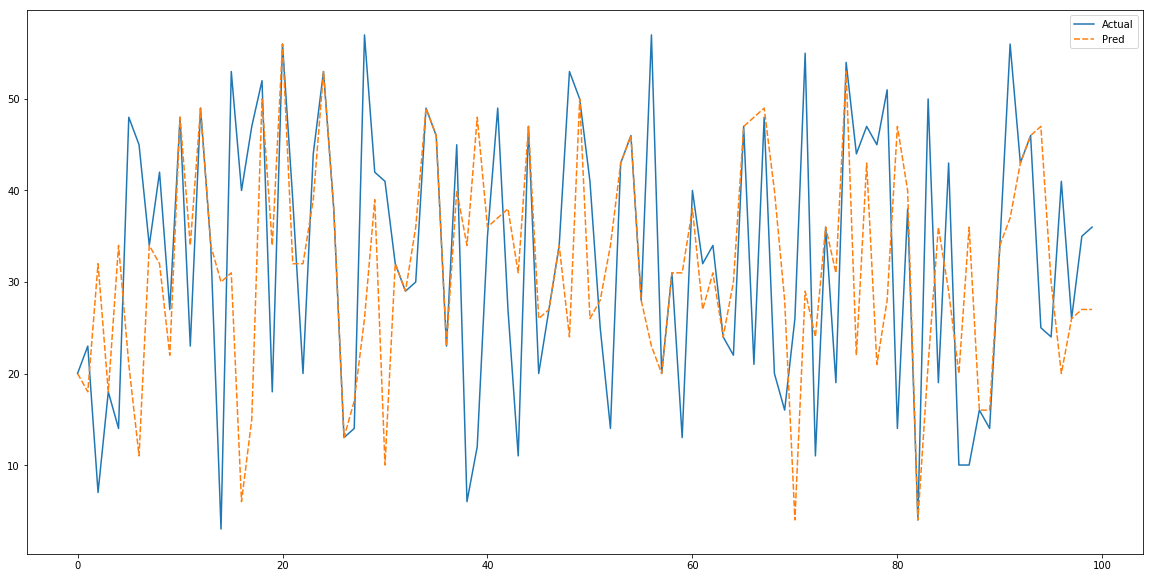

In [51]:
## %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)

sns.lineplot(ax=ax,data=test_val[:100],palette='tab10')